<a href="https://colab.research.google.com/github/abdipourasl/Deep-Learning-1402/blob/main/DL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Deep Learning Project #3<h1>
Amin Abdipour</h1>
</div>

#  ***Question 1***

### Importing Libraries

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=7a4a3ee86b5d2a7f89364ce7bdd73eeec1b0b3b15e24d2ce88b1967b7df6165a
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import numpy as np
import torch
#pip install minisom
from minisom import MiniSom
from scipy.io import loadmat
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow
from PIL import Image
from torch.utils.data import random_split, DataLoader
import torch.nn as nn

Mounted at /content/drive


### 1. Import  Data

In [3]:
dir = op.join('/content/drive/My Drive/','DL','DL_HW03','ids2.mat')  # Path to the Data folder
ids2 = loadmat(dir)
dir = op.join('/content/drive/My Drive/','DL','DL_HW03','GLI_85.mat')  # Path to the Data folder
GLI_85 = loadmat(dir)
dir = op.join('/content/drive/My Drive/','DL','DL_HW03','lung.mat')  # Path to the Data folder
lung = loadmat(dir)
dir = op.join('/content/drive/My Drive/','DL','DL_HW03','nci9.mat')  # Path to the Data folder
nci9 = loadmat(dir)
dir = op.join('/content/drive/My Drive/','DL','DL_HW03','USPS.mat')  # Path to the Data folder
USPS = loadmat(dir)

### 2.1. ids2  Data
map_size = (2, 3),
class_num = 5



Choose data

In [ ]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9021334580917236
Normalized Mutual Information (NMI): 0.8873154144817597


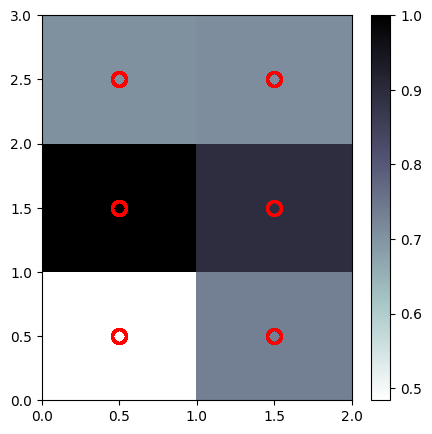

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 2.2 ids2  Data
map_size = (4, 4),
class_num = 5



Choose data

In [ ]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9925297896841667
Normalized Mutual Information (NMI): 0.9628125155252276


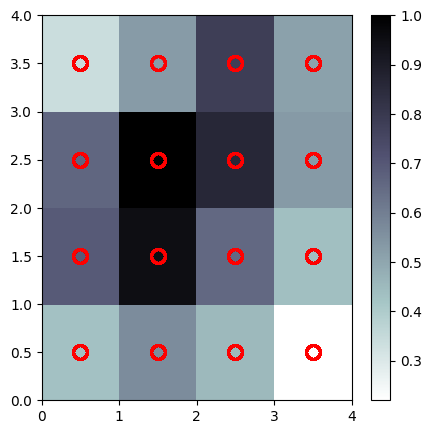

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 2.3 ids2  Data
map_size = (5, 5),
class_num = 5


Choose data

In [ ]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9956379003314005
Normalized Mutual Information (NMI): 0.9766229736604498


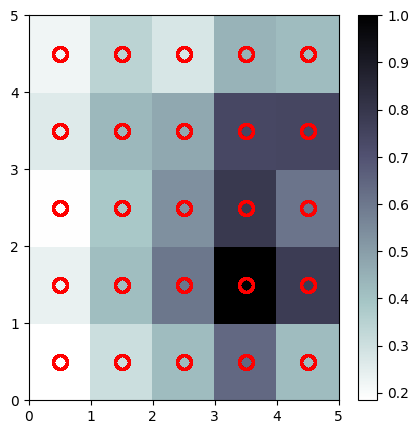

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.1 GLI_85  Data
map_size = (2, 1),
class_num = 2



Choose data

In [ ]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [ ]:
true_labels = labels.reshape(-1)

/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


F1 Score: 0.5687908496732026
Normalized Mutual Information (NMI): 0.0


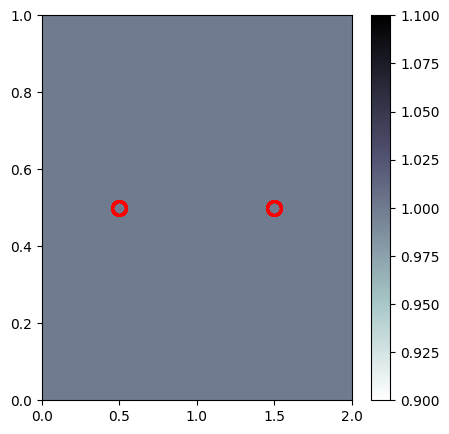

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 1)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.2 GLI_85  Data
map_size = (2, 2)
class_num = 2



Choose data

In [ ]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.7005248380343875
Normalized Mutual Information (NMI): 0.06475868347136261


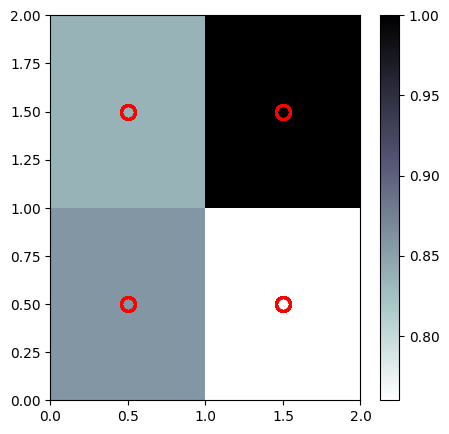

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 2)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.3 GLI_85  Data
map_size = (3, 3)
class_num = 2


Choose data

In [ ]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.8164589973920603
Normalized Mutual Information (NMI): 0.27960728138622704


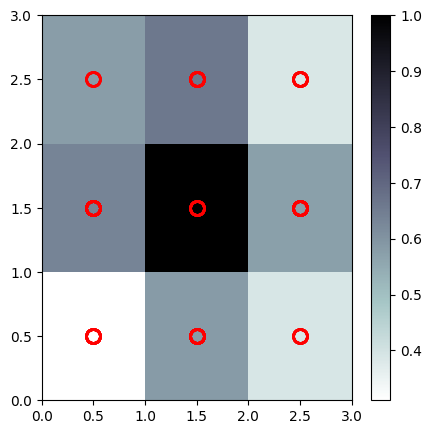

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (3, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.1. lung  Data
map_size = (2, 3),
class_num = 4



Choose data

In [ ]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9085516799638462
Normalized Mutual Information (NMI): 0.7655851107097011


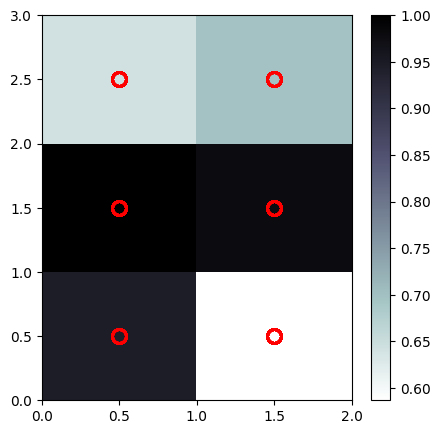

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.2 lung  Data
map_size = (4, 4),
class_num = 4



Choose data

In [ ]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9451846147221726
Normalized Mutual Information (NMI): 0.7870113674609689


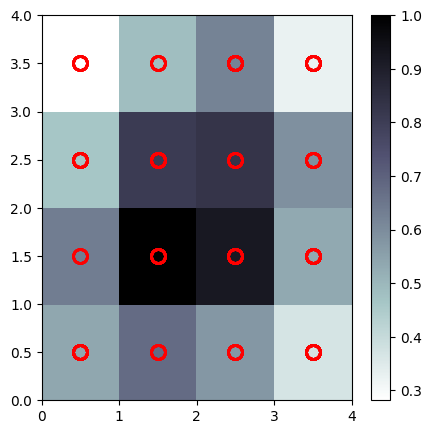

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.3 lung  Data
map_size = (5, 5),
class_num = 4


Choose data

In [ ]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.9403200036095409
Normalized Mutual Information (NMI): 0.76281025778996


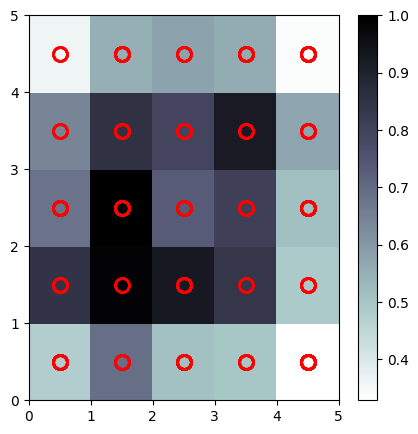

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.1. nci9  Data
map_size = (3, 3),
class_num = 9



Choose data

In [ ]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.39480075480075477
Normalized Mutual Information (NMI): 0.3963087371095415


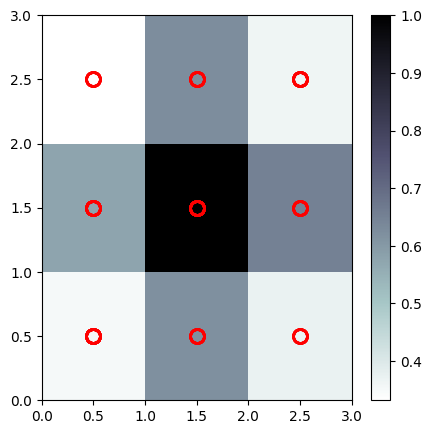

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (3, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.2 nci9  Data
map_size = (4, 4),
class_num = 9



Choose data

In [ ]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.6542302604802605
Normalized Mutual Information (NMI): 0.604502139640897


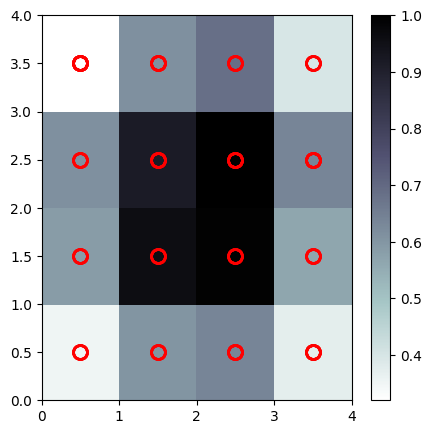

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.3 nci9  Data
map_size = (5, 5),
class_num = 9


Choose data

In [ ]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.6380254686833633
Normalized Mutual Information (NMI): 0.6129313043543404


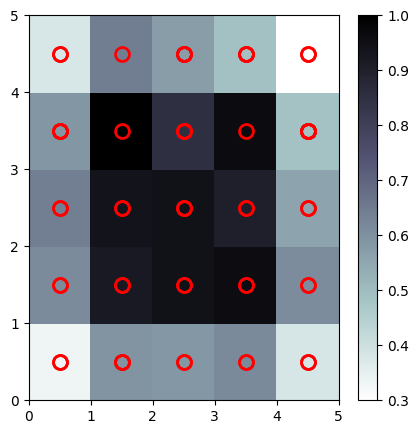

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.1. USPS  Data
map_size = (2, 5),
class_num = 10



Choose data

In [ ]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.6833781727392094
Normalized Mutual Information (NMI): 0.6089084526372736


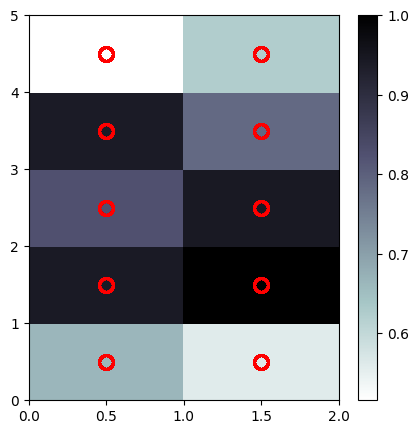

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.2 USPS  Data
map_size = (4, 4),
class_num = 10



Choose data

In [ ]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.7438223748283179
Normalized Mutual Information (NMI): 0.6430325838750355


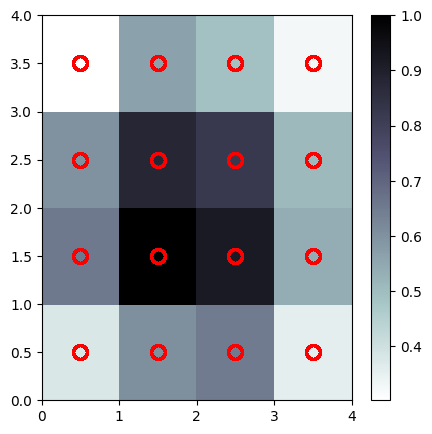

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.3 USPS  Data
map_size = (5, 5),
class_num = 10


Choose data

In [ ]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [ ]:
true_labels = labels.reshape(-1)

F1 Score: 0.8253318005748799
Normalized Mutual Information (NMI): 0.7155378155017895


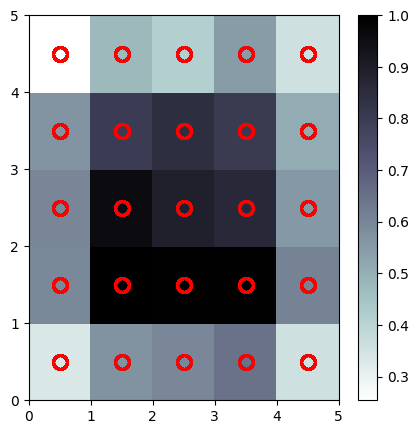

In [ ]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


#  ***Question 2 : SOM with a hexagonal topology***

### 2.1. ids2  Data
map_size = (2, 3),
class_num = 5



Choose data

In [161]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [162]:
true_labels = labels.reshape(-1)

F1 Score: 0.9032522752537715
Normalized Mutual Information (NMI): 0.8920476658093498


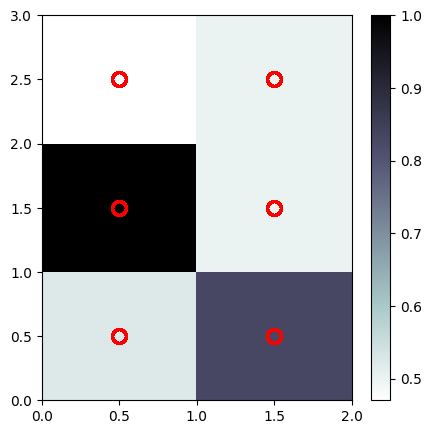

In [163]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 2.2 ids2  Data
map_size = (4, 4),
class_num = 5



Choose data

In [164]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [165]:
true_labels = labels.reshape(-1)

F1 Score: 0.9971911738169931
Normalized Mutual Information (NMI): 0.9832864566454396


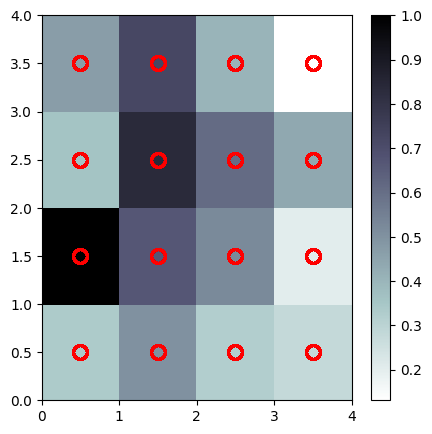

In [166]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 2.3 ids2  Data
map_size = (5, 5),
class_num = 5


Choose data

In [167]:
data = ids2['data']
labels = ids2['label']
n_class = ids2['class_num']
data.shape

(3200, 2)

In [168]:
true_labels = labels.reshape(-1)

F1 Score: 0.9928252519084028
Normalized Mutual Information (NMI): 0.9668518758710081


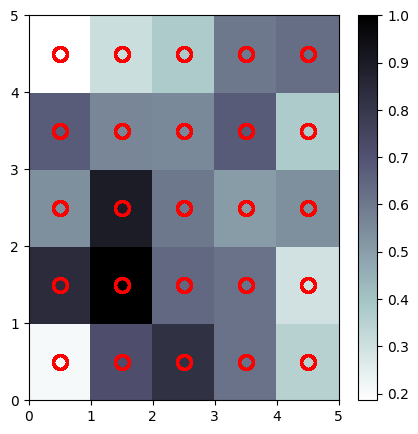

In [169]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.1 GLI_85  Data
map_size = (2, 1),
class_num = 2



Choose data

In [170]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [171]:
true_labels = labels.reshape(-1)

/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


F1 Score: 0.5687908496732026
Normalized Mutual Information (NMI): 0.0


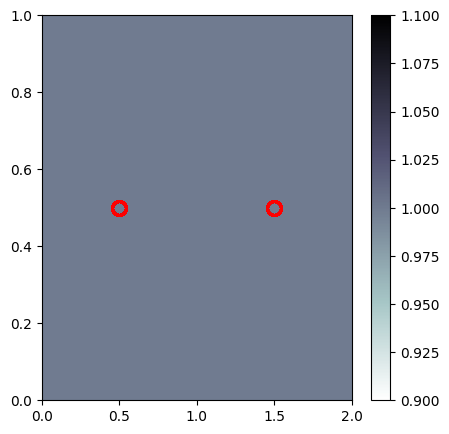

In [172]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 1)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.2 GLI_85  Data
map_size = (2, 2)
class_num = 2



Choose data

In [173]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [174]:
true_labels = labels.reshape(-1)

F1 Score: 0.5687908496732026
Normalized Mutual Information (NMI): 0.0


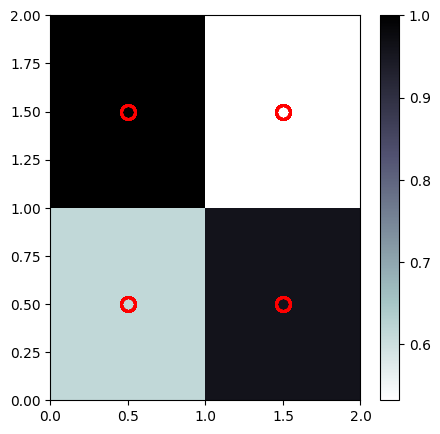

In [175]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 2)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 3.3 GLI_85  Data
map_size = (3, 3)
class_num = 2


Choose data

In [176]:
data = GLI_85['X']
labels = GLI_85['Y']
# n_class = ids2['class_num']
data.shape

(85, 22283)

In [177]:
true_labels = labels.reshape(-1)

F1 Score: 0.8040425707449881
Normalized Mutual Information (NMI): 0.23380782307368184


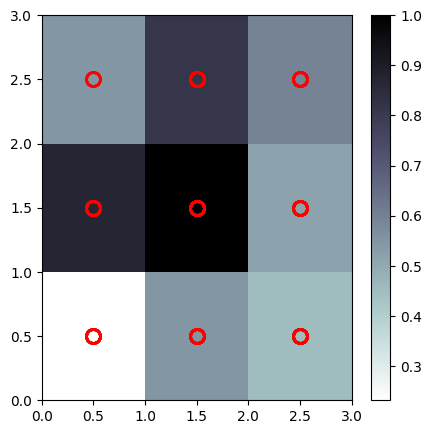

In [178]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (3, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.1. lung  Data
map_size = (2, 3),
class_num = 4



Choose data

In [179]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [180]:
true_labels = labels.reshape(-1)

F1 Score: 0.9040832233935682
Normalized Mutual Information (NMI): 0.7559579302041219


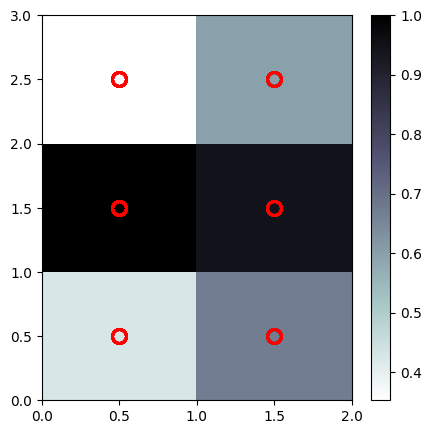

In [181]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.2 lung  Data
map_size = (4, 4),
class_num = 4



Choose data

In [182]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [183]:
true_labels = labels.reshape(-1)

F1 Score: 0.9402888110846562
Normalized Mutual Information (NMI): 0.7645756259627313


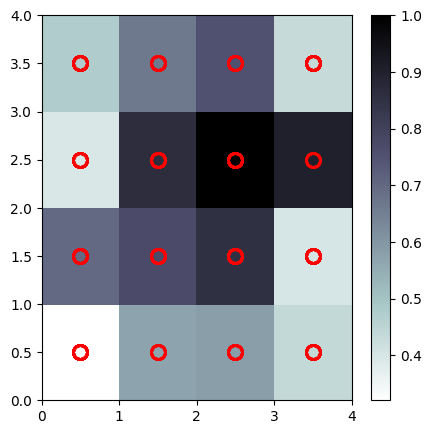

In [184]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 4.3 lung  Data
map_size = (5, 5),
class_num = 4


Choose data

In [185]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [186]:
true_labels = labels.reshape(-1)

F1 Score: 0.9557541543627343
Normalized Mutual Information (NMI): 0.821503141166449


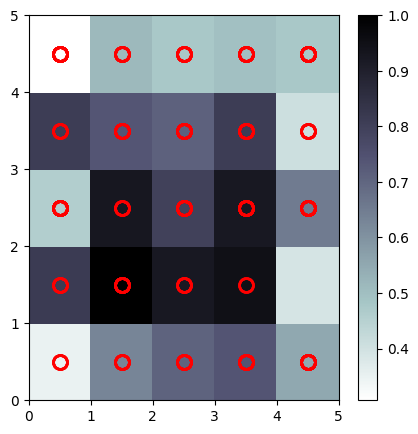

In [187]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.1. nci9  Data
map_size = (3, 3),
class_num = 9



Choose data

In [188]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [189]:
true_labels = labels.reshape(-1)

F1 Score: 0.37485449735449733
Normalized Mutual Information (NMI): 0.39913618556452657


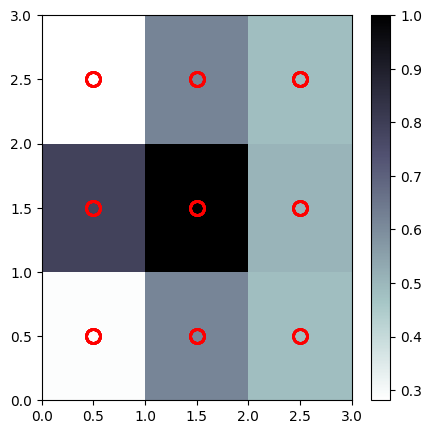

In [190]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (3, 3)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.2 nci9  Data
map_size = (4, 4),
class_num = 9



Choose data

In [191]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [192]:
true_labels = labels.reshape(-1)

F1 Score: 0.5141825916019465
Normalized Mutual Information (NMI): 0.5026294637653883


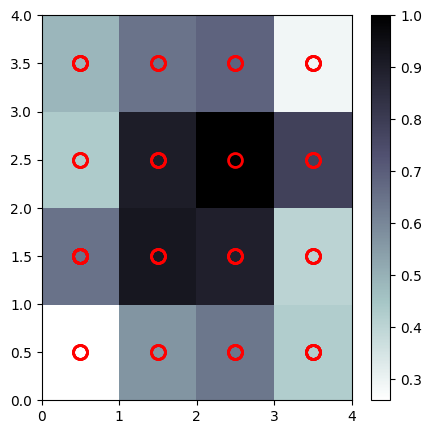

In [193]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 5.3 nci9  Data
map_size = (5, 5),
class_num = 9


Choose data

In [194]:
data = nci9['X']
labels = nci9['Y']
# n_class = ids2['class_num']
data.shape

(60, 9712)

In [195]:
true_labels = labels.reshape(-1)

F1 Score: 0.6758989898989899
Normalized Mutual Information (NMI): 0.639657152425889


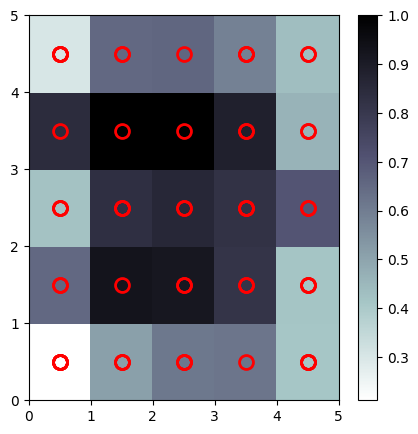

In [196]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.1. USPS  Data
map_size = (2, 5),
class_num = 10



Choose data

In [197]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [198]:
true_labels = labels.reshape(-1)

F1 Score: 0.6944159395599354
Normalized Mutual Information (NMI): 0.6154314199372344


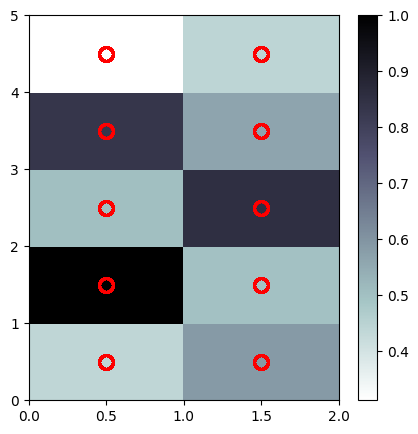

In [199]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (2, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size, sigma=1.0,topology='hexagonal', learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.2 USPS  Data
map_size = (4, 4),
class_num = 10



Choose data

In [200]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [201]:
true_labels = labels.reshape(-1)

F1 Score: 0.7573926256892604
Normalized Mutual Information (NMI): 0.6528339589549269


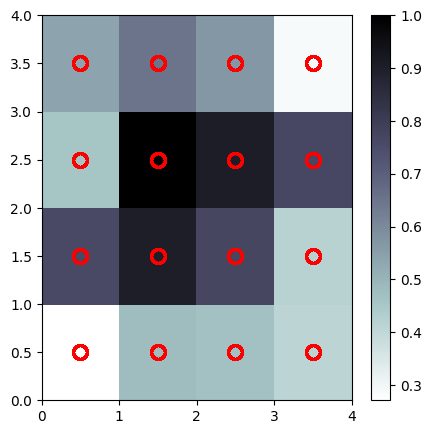

In [202]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


### 6.3 USPS  Data
map_size = (5, 5),
class_num = 10


Choose data

In [203]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [204]:
true_labels = labels.reshape(-1)

F1 Score: 0.8043688542888106
Normalized Mutual Information (NMI): 0.7022215462591223


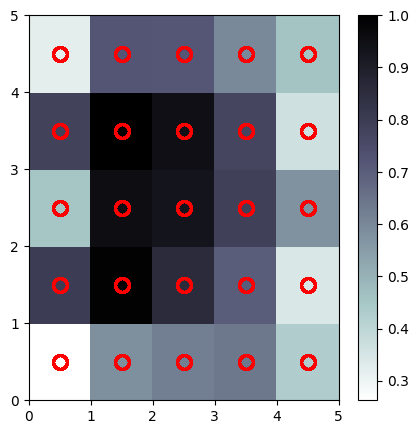

In [205]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (5, 5)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# Reshape the cluster assignments for compatibility with sklearn metrics
cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

clusters = np.unique(cluster_assignments_flat)
mapped_labels = np.zeros_like(cluster_assignments_flat)
map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # Calculate F1 score
f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the SOM
plt.figure(figsize=(5, 5))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a heatmap
plt.colorbar()

# Mark the data points on the map
for i, sample in enumerate(data):
    winner_index = som.winner(sample)
    plt.plot(winner_index[0] + 0.5, winner_index[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


#  ***Question 3: Train MLP***


## lung  Data
class_num = 4


### 1. Load Data

In [212]:
data1 = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data1.shape

(203, 3312)

In [213]:
true_labels = labels.reshape(-1)

In [214]:
from torch.utils.data import TensorDataset, DataLoader, random_split

input_tensor = torch.tensor(data1, dtype=torch.float32)
label_tensor = torch.tensor(true_labels, dtype=torch.long)  # Assuming labels are integers

# Create a TensorDataset
dataset = TensorDataset(input_tensor, label_tensor)

torch.manual_seed(42)

# Shuffle the dataset
shuffled_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

# Split into training and validation sets8 (0% train, 20% validation)
train_dataset, val_dataset = shuffled_dataset

# Create DataLoaders for training and validation
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




# dataset = torch.utils.data.TensorDataset(torch.tensor(data1),torch.tensor(labels))
# dataset = torch.cat((a, b))
# print(dataset)

### 2. Define Network Model

In [215]:
model = nn.Sequential(
    nn.Linear(data1.shape[1], 4096),
    nn.ReLU(),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 5),
)

### 3. Define Optimizer & Loss function

In [216]:
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum= 0.4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


### 4. Train Model

In [217]:
n_epochs = 300
model.train() # prep model for training
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in train_loader:

        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        target = (target - 1)

        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    if epoch % 8 == 0:
      scheduler.step()
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.355573
Epoch: 2 	Training Loss: 1.194636
Epoch: 3 	Training Loss: 1.064943
Epoch: 4 	Training Loss: 1.049726
Epoch: 5 	Training Loss: 1.041389
Epoch: 6 	Training Loss: 1.031460
Epoch: 7 	Training Loss: 1.035191
Epoch: 8 	Training Loss: 1.027475
Epoch: 9 	Training Loss: 1.065498
Epoch: 10 	Training Loss: 1.055852
Epoch: 11 	Training Loss: 1.042225
Epoch: 12 	Training Loss: 1.031426
Epoch: 13 	Training Loss: 1.041744
Epoch: 14 	Training Loss: 1.005547
Epoch: 15 	Training Loss: 1.021596
Epoch: 16 	Training Loss: 1.037935
Epoch: 17 	Training Loss: 0.946151
Epoch: 18 	Training Loss: 1.066132
Epoch: 19 	Training Loss: 0.951131
Epoch: 20 	Training Loss: 0.934879
Epoch: 21 	Training Loss: 0.929560
Epoch: 22 	Training Loss: 1.007731
Epoch: 23 	Training Loss: 0.948489
Epoch: 24 	Training Loss: 0.844370
Epoch: 25 	Training Loss: 0.898435
Epoch: 26 	Training Loss: 1.062848
Epoch: 27 	Training Loss: 1.023034
Epoch: 28 	Training Loss: 0.987854
Epoch: 29 	Training Loss: 0.9

In [218]:
from sklearn import metrics

model.eval() # prep model for training
mlp_labels=[]
mlp_targets=[]
    # monitor training loss
val_loss = 0.0

for data, target in val_loader:
    output = model(data)
    p_label = torch.argmax(output,dim=1)
    target = (target - 1)
    loss = criterion(output, target)
    val_loss += loss.item()*data.size(0)
    mlp_labels+=p_label
    mlp_targets+=target
# calculate average loss over an epoch
val_loss = val_loss/len(val_loader.dataset)
f1 = metrics.f1_score(mlp_targets, mlp_labels, average='weighted')
print(f'f1 = {f1}')
print('Epoch: {} \tTest Loss: {:.6f}'.format(
    epoch+1,
    val_loss
    ))

f1 = 0.5542594556380346
Epoch: 300 	Test Loss: 1.031974


## USPS  Data
class_num = 10



### 1. Load Data

In [235]:
data1 = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data1.shape

(9298, 256)

In [236]:
true_labels = labels.reshape(-1)

In [237]:
from torch.utils.data import TensorDataset, DataLoader, random_split

input_tensor = torch.tensor(data1, dtype=torch.float32)
label_tensor = torch.tensor(true_labels, dtype=torch.long)  # Assuming labels are integers

# Create a TensorDataset
dataset = TensorDataset(input_tensor, label_tensor)

torch.manual_seed(42)

# Shuffle the dataset
shuffled_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

# Split into training and validation sets8 (0% train, 20% validation)
train_dataset, val_dataset = shuffled_dataset

# Create DataLoaders for training and validation
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




# dataset = torch.utils.data.TensorDataset(torch.tensor(data1),torch.tensor(labels))
# dataset = torch.cat((a, b))
# print(dataset)

### 2. Define Network Model

In [238]:
model = nn.Sequential(
    nn.Linear(data1.shape[1], 4096),
    nn.ReLU(),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    # nn.Linear(128, 64),
    # nn.ReLU(),
    # nn.Linear(64, 32),
    # nn.ReLU(),
    # nn.Linear(32, 16),
    # nn.ReLU(),
    # nn.Linear(16, 8),
    # nn.ReLU(),
    nn.Linear(64, 10),
)

### 3. Define Optimizer & Loss function

In [239]:
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum= 0.4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


### 4. Train Model

In [240]:
n_epochs = 20
model.train() # prep model for training
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in train_loader:

        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        target = (target - 1)

        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    if epoch % 8 == 0:
      scheduler.step()
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.705083
Epoch: 2 	Training Loss: 0.225714
Epoch: 3 	Training Loss: 0.166660
Epoch: 4 	Training Loss: 0.135345
Epoch: 5 	Training Loss: 0.115180
Epoch: 6 	Training Loss: 0.110342
Epoch: 7 	Training Loss: 0.086636
Epoch: 8 	Training Loss: 0.080404
Epoch: 9 	Training Loss: 0.080753
Epoch: 10 	Training Loss: 0.047282
Epoch: 11 	Training Loss: 0.034678
Epoch: 12 	Training Loss: 0.045936
Epoch: 13 	Training Loss: 0.048118
Epoch: 14 	Training Loss: 0.045640
Epoch: 15 	Training Loss: 0.035475
Epoch: 16 	Training Loss: 0.036140
Epoch: 17 	Training Loss: 0.030556
Epoch: 18 	Training Loss: 0.019269
Epoch: 19 	Training Loss: 0.019343
Epoch: 20 	Training Loss: 0.009187


In [241]:
from sklearn import metrics

model.eval() # prep model for training
mlp_labels=[]
mlp_targets=[]
    # monitor training loss
val_loss = 0.0

for data, target in val_loader:
    output = model(data)
    p_label = torch.argmax(output,dim=1)
    target = (target - 1)
    loss = criterion(output, target)
    val_loss += loss.item()*data.size(0)
    mlp_labels+=p_label
    mlp_targets+=target
# calculate average loss over an epoch
val_loss = val_loss/len(val_loader.dataset)
f1 = metrics.f1_score(mlp_targets, mlp_labels, average='weighted')
print(f'f1 = {f1}')
print('Epoch: {} \tTest Loss: {:.6f}'.format(
    epoch+1,
    val_loss
    ))

f1 = 0.977438662706033
Epoch: 20 	Test Loss: 0.103853


#  ***Question 4: Train SOM then MLP***


## lung  Data
map_size = (4, 4),
class_num = 4



Choose data

In [261]:
data = lung['X']
labels = lung['Y']
# n_class = ids2['class_num']
data.shape

(203, 3312)

In [262]:
true_labels = labels.reshape(-1)

In [263]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# # Reshape the cluster assignments for compatibility with sklearn metrics
# cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

# clusters = np.unique(cluster_assignments_flat)
# mapped_labels = np.zeros_like(cluster_assignments_flat)
# map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

# mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # # Calculate F1 score
# f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# # Calculate Normalized Mutual Information (NMI)
# nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# # Print the results
# print(f"F1 Score: {f1}")
# print(f"Normalized Mutual Information (NMI): {nmi}")


In [264]:
data1 = cluster_assignments
labels = lung['Y']
# n_class = ids2['class_num']
data1.shape

(203, 2)

In [265]:
true_labels = labels.reshape(-1)

In [266]:
from torch.utils.data import TensorDataset, DataLoader, random_split

input_tensor = torch.tensor(data1, dtype=torch.float32)
label_tensor = torch.tensor(true_labels, dtype=torch.long)  # Assuming labels are integers

# Create a TensorDataset
dataset = TensorDataset(input_tensor, label_tensor)

torch.manual_seed(42)

# Shuffle the dataset
shuffled_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

# Split into training and validation sets8 (0% train, 20% validation)
train_dataset, val_dataset = shuffled_dataset

# Create DataLoaders for training and validation
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




# dataset = torch.utils.data.TensorDataset(torch.tensor(data1),torch.tensor(labels))
# dataset = torch.cat((a, b))
# print(dataset)

In [267]:
model = nn.Sequential(
    nn.Linear(data1.shape[1], 4096),
    nn.ReLU(),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    # nn.Linear(128, 64),
    # nn.ReLU(),
    # nn.Linear(64, 32),
    # nn.ReLU(),
    # nn.Linear(32, 16),
    # nn.ReLU(),
    # nn.Linear(16, 8),
    # nn.ReLU(),
    nn.Linear(64, 5),
)

In [268]:
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum= 0.4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


In [269]:
n_epochs = 300
model.train() # prep model for training
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in train_loader:

        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        target = (target - 1)

        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    if epoch % 8 == 0:
      scheduler.step()
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.356591
Epoch: 2 	Training Loss: 1.021594
Epoch: 3 	Training Loss: 0.902715
Epoch: 4 	Training Loss: 0.741793
Epoch: 5 	Training Loss: 0.763751
Epoch: 6 	Training Loss: 0.785025
Epoch: 7 	Training Loss: 0.609881
Epoch: 8 	Training Loss: 0.521468
Epoch: 9 	Training Loss: 0.378864
Epoch: 10 	Training Loss: 0.549504
Epoch: 11 	Training Loss: 0.299296
Epoch: 12 	Training Loss: 0.414404
Epoch: 13 	Training Loss: 0.368662
Epoch: 14 	Training Loss: 0.312172
Epoch: 15 	Training Loss: 0.500068
Epoch: 16 	Training Loss: 0.387024
Epoch: 17 	Training Loss: 0.266171
Epoch: 18 	Training Loss: 0.320377
Epoch: 19 	Training Loss: 0.280252
Epoch: 20 	Training Loss: 0.261606
Epoch: 21 	Training Loss: 0.423972
Epoch: 22 	Training Loss: 0.415334
Epoch: 23 	Training Loss: 0.319456
Epoch: 24 	Training Loss: 0.321670
Epoch: 25 	Training Loss: 0.369517
Epoch: 26 	Training Loss: 0.241732
Epoch: 27 	Training Loss: 0.214143
Epoch: 28 	Training Loss: 0.240679
Epoch: 29 	Training Loss: 0.2

In [270]:
from sklearn import metrics

model.eval() # prep model for training
mlp_labels=[]
mlp_targets=[]
    # monitor training loss
val_loss = 0.0

for data, target in val_loader:
    output = model(data)
    p_label = torch.argmax(output,dim=1)
    target = (target - 1)
    loss = criterion(output, target)
    val_loss += loss.item()*data.size(0)
    mlp_labels+=p_label
    mlp_targets+=target
# calculate average loss over an epoch
val_loss = val_loss/len(val_loader.dataset)
f1 = metrics.f1_score(mlp_targets, mlp_labels, average='weighted')
print(f'f1 = {f1}')
print('Epoch: {} \tTest Loss: {:.6f}'.format(
    epoch+1,
    val_loss
    ))

f1 = 0.9272727272727274
Epoch: 300 	Test Loss: 0.316254


## USPS  Data
map_size = (4, 4),
class_num = 10



Choose data

In [271]:
data = USPS['X']
labels = USPS['Y']
# n_class = ids2['class_num']
data.shape

(9298, 256)

In [272]:
true_labels = labels.reshape(-1)

In [273]:
from sklearn import metrics

input_size = data.shape[1]
# Define SOM parameters
map_size = (4, 4)
learning_rate = 0.1
num_epochs = 10000

# Create and initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_size,topology='hexagonal', sigma=1.0, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, num_epochs)

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(sample) for sample in data])

# # Reshape the cluster assignments for compatibility with sklearn metrics
# cluster_assignments_flat = cluster_assignments[:, 0] * map_size[1] + cluster_assignments[:, 1] +1

# clusters = np.unique(cluster_assignments_flat)
# mapped_labels = np.zeros_like(cluster_assignments_flat)
# map = {cluster: np.argmax(np.bincount(true_labels[np.where(cluster_assignments_flat == cluster)[0]].flatten())) for cluster in clusters}

# mapped_labels = np.array([map[cluster] for cluster in cluster_assignments_flat])


# # # Calculate F1 score
# f1 = metrics.f1_score(true_labels, mapped_labels, average='weighted')

# # Calculate Normalized Mutual Information (NMI)
# nmi = metrics.normalized_mutual_info_score(true_labels, mapped_labels)

# # Print the results
# print(f"F1 Score: {f1}")
# print(f"Normalized Mutual Information (NMI): {nmi}")


In [274]:
data1 = cluster_assignments
labels = USPS['Y']
# n_class = ids2['class_num']
data1.shape

(9298, 2)

In [275]:
true_labels = labels.reshape(-1)

In [276]:
from torch.utils.data import TensorDataset, DataLoader, random_split

input_tensor = torch.tensor(data1, dtype=torch.float32)
label_tensor = torch.tensor(true_labels, dtype=torch.long)  # Assuming labels are integers

# Create a TensorDataset
dataset = TensorDataset(input_tensor, label_tensor)

torch.manual_seed(42)

# Shuffle the dataset
shuffled_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

# Split into training and validation sets8 (0% train, 20% validation)
train_dataset, val_dataset = shuffled_dataset

# Create DataLoaders for training and validation
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




# dataset = torch.utils.data.TensorDataset(torch.tensor(data1),torch.tensor(labels))
# dataset = torch.cat((a, b))
# print(dataset)

In [277]:
model = nn.Sequential(
    nn.Linear(data1.shape[1], 4096),
    nn.ReLU(),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    # nn.Linear(128, 64),
    # nn.ReLU(),
    # nn.Linear(64, 32),
    # nn.ReLU(),
    # nn.Linear(32, 16),
    # nn.ReLU(),
    # nn.Linear(16, 8),
    # nn.ReLU(),
    nn.Linear(64, 10),
)

In [278]:
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum= 0.4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


In [279]:
n_epochs = 50
model.train() # prep model for training
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in train_loader:

        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        target = (target - 1)

        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    if epoch % 8 == 0:
      scheduler.step()
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.249030
Epoch: 2 	Training Loss: 0.926321
Epoch: 3 	Training Loss: 0.858926
Epoch: 4 	Training Loss: 0.859904
Epoch: 5 	Training Loss: 0.840154
Epoch: 6 	Training Loss: 0.830872
Epoch: 7 	Training Loss: 0.821891
Epoch: 8 	Training Loss: 0.807478
Epoch: 9 	Training Loss: 0.802716
Epoch: 10 	Training Loss: 0.799157
Epoch: 11 	Training Loss: 0.792226
Epoch: 12 	Training Loss: 0.788358
Epoch: 13 	Training Loss: 0.804390
Epoch: 14 	Training Loss: 0.793885
Epoch: 15 	Training Loss: 0.790684
Epoch: 16 	Training Loss: 0.781638
Epoch: 17 	Training Loss: 0.787875
Epoch: 18 	Training Loss: 0.778273
Epoch: 19 	Training Loss: 0.783243
Epoch: 20 	Training Loss: 0.779114
Epoch: 21 	Training Loss: 0.775044
Epoch: 22 	Training Loss: 0.777780
Epoch: 23 	Training Loss: 0.776176
Epoch: 24 	Training Loss: 0.780839
Epoch: 25 	Training Loss: 0.773880
Epoch: 26 	Training Loss: 0.771176
Epoch: 27 	Training Loss: 0.771804
Epoch: 28 	Training Loss: 0.769894
Epoch: 29 	Training Loss: 0.7

In [280]:
from sklearn import metrics

model.eval() # prep model for training
mlp_labels=[]
mlp_targets=[]
    # monitor training loss
val_loss = 0.0

for data, target in val_loader:
    output = model(data)
    p_label = torch.argmax(output,dim=1)
    target = (target - 1)
    loss = criterion(output, target)
    val_loss += loss.item()*data.size(0)
    mlp_labels+=p_label
    mlp_targets+=target
# calculate average loss over an epoch
val_loss = val_loss/len(val_loader.dataset)
f1 = metrics.f1_score(mlp_targets, mlp_labels, average='weighted')
print(f'f1 = {f1}')
print('Epoch: {} \tTest Loss: {:.6f}'.format(
    epoch+1,
    val_loss
    ))

f1 = 0.7321713342360127
Epoch: 50 	Test Loss: 0.761219
